## Imports

In [31]:
# Standard
import json
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# Models
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import RandomOverSampler

# Scoring
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


## Data

In [32]:
df = pd.read_csv('.\\raw_data\\train.csv')

## Visualize

In [33]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']

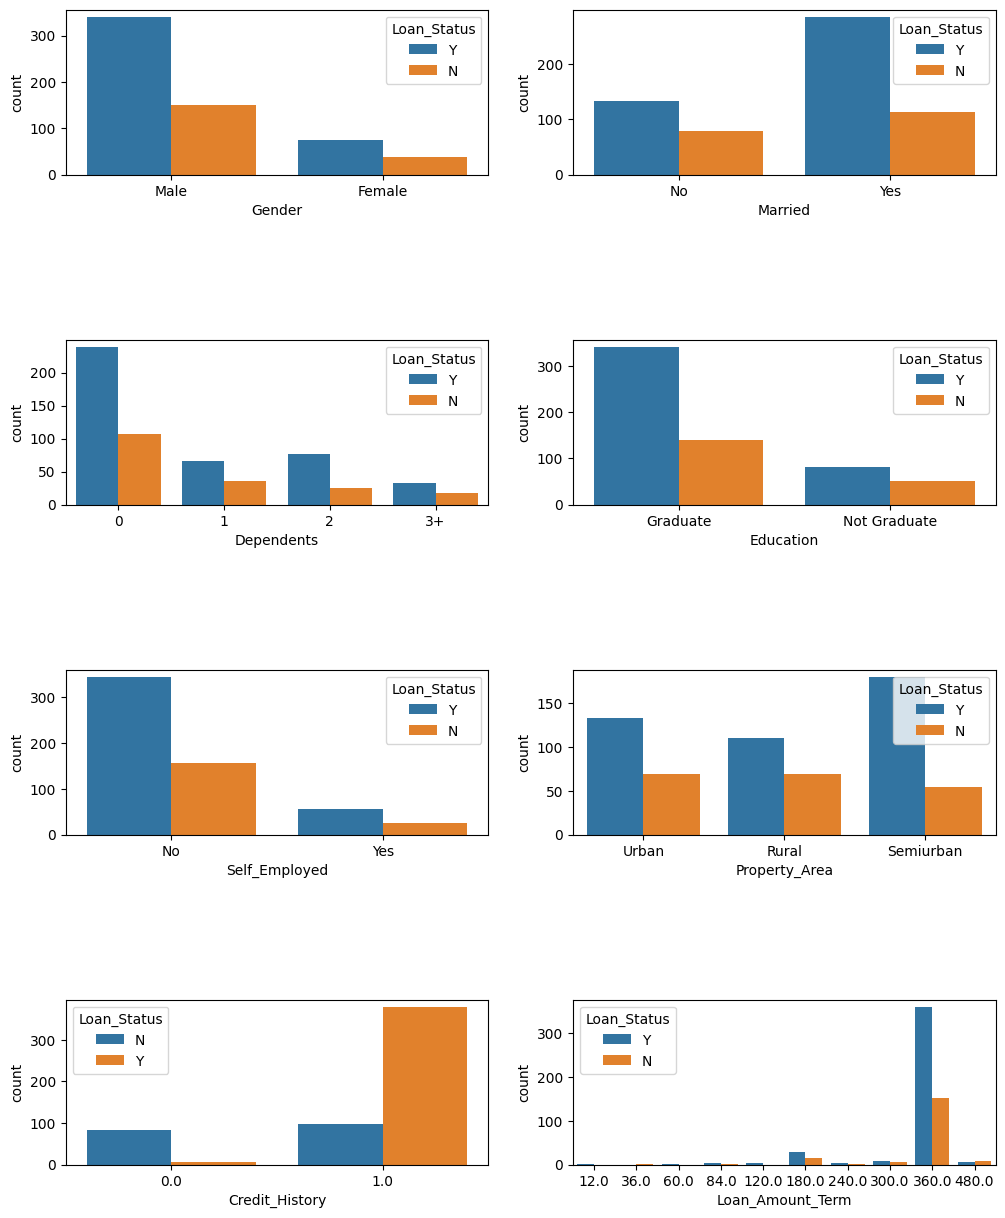

In [9]:
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  592.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   85.587325
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.000000
50%        3812.500000        1188.500000  128.000000
75%        5795.000000        2297.250000  168.000000
max       81000.000000       41667.000000  700.000000


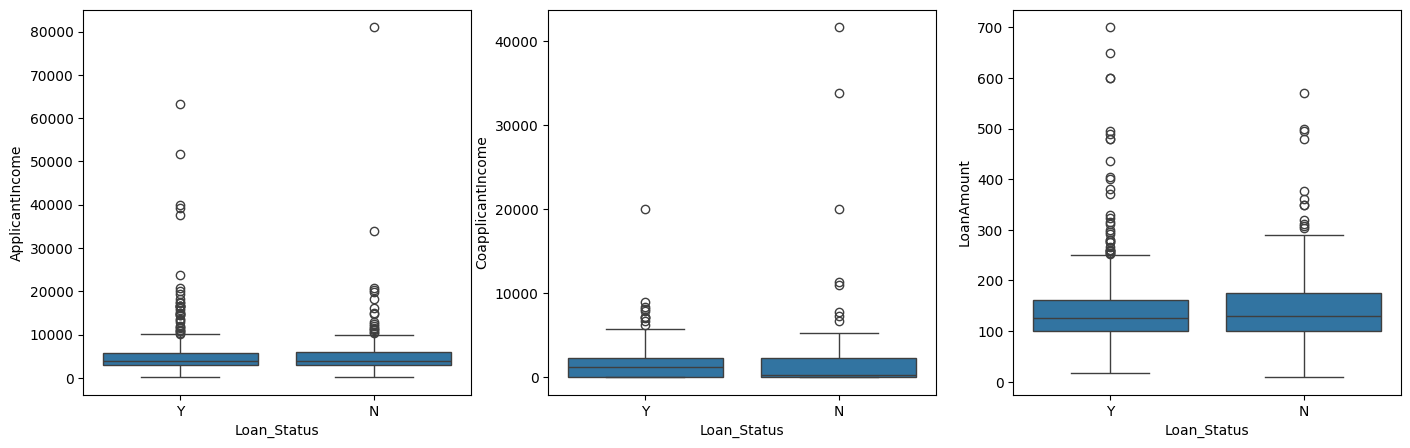

In [5]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=df,x='Loan_Status',ax=axes[idx])

print(df[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

## Cull Outliers

In [10]:
df.drop(df['ApplicantIncome'][df['ApplicantIncome']>20000].index, inplace=True)
df.drop(df['CoapplicantIncome'][df['CoapplicantIncome']>10000].index, inplace=True)
df.drop(df['LoanAmount'][df['LoanAmount']>350].index, inplace=True)

## Impute Missing Data

In [11]:
#Inputing the missing numeric data with median value
for i in df[numerical_columns]:
    print(i,':' ,round(df[i].median(),2))
    df[i].fillna(round(df[i].median(),2),inplace=True)

ApplicantIncome : 3748.0
CoapplicantIncome : 1210.0
LoanAmount : 125.0


In [12]:
#Imputing Categorial data with mode
for i in df[categorical_columns]:
    print(i,':', df[i].mode()[0])
    df[i].fillna(df[i].mode()[0],inplace=True)

Gender : Male
Married : Yes
Dependents : 0
Education : Graduate
Self_Employed : No
Property_Area : Semiurban
Credit_History : 1.0
Loan_Amount_Term : 360.0


## Encode Data

In [13]:
def encode(df, labels):
    le = LabelEncoder()
    for label in labels:
        le.fit(df[label])
        df[label] = le.transform(df[label])
    return df

In [14]:
df['Dependents'] = df['Dependents'].replace('3+', 3)
df = encode(df, ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'])

In [27]:
df.isna().sum()

Loan_ID           0
Gender            0
Married           0
Dependents        0
Education         0
Self_Employed     0
Credit_History    0
Property_Area     0
Loan_Status       0
TotalIncome       0
EMI               0
BalanceIncome     0
dtype: int64

In [15]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,125.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


## Feature Design

In [16]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']
df['EMI']=df['LoanAmount']/df['Loan_Amount_Term']
df['BalanceIncome']=df['TotalIncome']-df['EMI']

df.drop(['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','LoanAmount'],axis=1,inplace=True)

In [17]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,TotalIncome,EMI,BalanceIncome
0,LP001002,1,0,0,0,0,1.0,2,1,5849.0,0.347222,5848.652778
1,LP001003,1,1,1,0,0,1.0,0,0,6091.0,0.355556,6090.644444
2,LP001005,1,1,0,0,1,1.0,2,1,3000.0,0.183333,2999.816667
3,LP001006,1,1,0,1,0,1.0,2,1,4941.0,0.333333,4940.666667
4,LP001008,1,0,0,0,0,1.0,2,1,6000.0,0.391667,5999.608333


## Write processed DataFrame

In [25]:
file_name = 'P_1'
f = open(f'.\\processed_data\\{file_name}.pki', 'wb')
pickle.dump(df, f)
f.close()